In [3]:
import pandas as pd
import numpy as np
import sys,os,time
from tqdm import trange,tqdm

In [4]:
import statsmodels.api as sm
import statsmodels.stats.multitest

In [7]:
#make p-val file for MAGMA run
tblfile=pd.read_csv("/exports/reum/CKe/RunMeta/METALresult_filtered.TBL",sep='\t')
inputfile=tblfile.loc[:,['MarkerName','CHR','BP']]
A1compare=pd.read_csv("/exports/reum/CKe/compareA1.txt",sep='\t')
merge=pd.merge(tblfile,A1compare,left_on="MarkerName",right_on="SNP",how="left")

/home/cke/.conda/envs/CKe/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (3,4,5,6,7,8,9,10,11,12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [20]:
merge['MarkerName'].to_csv("/exports/reum/CKe/gene_analysis/chrpos_snp_METAL.tsv",sep='\t',index=None)

In [32]:
merge

MarkerName         BP  CHR Allele1 Allele2  Effect  StdErr  \
0          5:29439275   29439275    5       t       c -0.0083  0.0450   
1          5:85928892   85928892    5       t       c -0.1423  0.0921   
2         2:170966953  170966953    2       t       c  0.0183  0.2006   
3        10:128341232  128341232   10       t       c -0.0070  0.0455   
4          3:62707519   62707519    3       t       c  0.0930  0.0949   
...               ...        ...  ...     ...     ...     ...     ...   
6830697    3:80436770   80436770    3       a       g  0.2546  0.1113   
6830698   18:44156714   44156714   18       c       g -0.0485  0.0564   
6830699    5:95076854   95076854    5       a       g  0.0594  0.0864   
6830700   11:99622387   99622387   11       t       c -0.0378  0.0585   
6830701   4:104138439  104138439    4       a       g  0.1012  0.1388   

         P-value     Direction  Unnamed: 0  ... A1_EIRA  A1_SERA A1_EAC  \
0        0.85280  ---++-++--?-     2239116  ...       T        T      T   
1        0.12260  ----+---+-??     2371528  ...       T        T      T   
2        0.92740  -+?++?+?-+??      955511  ...       C        C      C   
3        0.87790  +-?--+----??     4531316  ...       T        T      T   
4        0.32700  +++--++---?+     1299854  ...       T        T      T   
...          ...           ...         ...  ...     ...      ...    ...   
6830697  0.02212  +++-++++-+??     1345505  ...       G        G      G   
6830698  0.38930  ++-+-----+?-     6444468  ...       C        C      C   
6830699  0.49170  +---+-+--+??     2387247  ...       G        G      G   
6830700  0.51810  -++-+-+-++??     4814444  ...       C        C      C   
6830701  0.46610  ++?-+++-++??     1919343  ...       A        A      A   

        A1_EARTHA A1_Vienna A1_PEAC A1_TACERA A1_Leeds A1_EARTHB Uniqueness  
0               T         T       T       NaN        T         T          T  
1               T         T       T       NaN        T         T          T  
2               C       NaN     NaN         C        C         C          C  
3               T         T       C       NaN        T         T         TC  
4               T         T       T         T        T         T          T  
...           ...       ...     ...       ...      ...       ...        ...  
6830697         G         G       G       NaN      NaN         G          G  
6830698         C         C       C       NaN        C         C          C  
6830699         G         G       G       NaN      NaN         G          G  
6830700         C         C       C       NaN        C         C          C  
6830701         A         A     NaN       NaN      NaN         A          A  

[6830702 rows x 25 columns]

In [28]:
rsid=pd.read_csv("/exports/reum/CKe/gene_analysis/chrpos_snp_METAL.tsv_rsids.txt",sep='\s+')

In [5]:
"""
on Samantha's GWAS
with window 35kb up 10kb down
no snp synomynous file
with PCA
multi= snp-wise
on c2_c3_c5_c7 combined 
"""
Mingdong_gene = pd.read_csv("/exports/reum/CKe/gene_analysis/Mingdong_files/data_v9/all_merged_v8.genes.out",sep='\s+')
tophits_gene_Mingdong = Mingdong_gene.sort_values('P_MULTI')[:50]
Mingdong_gene.sort_values('P_MULTI')

GENE  CHR      START       STOP  NSNPS  NPARAM     N   ZSTAT  \
15459    2837   17   80295647   80343528    179      17  4338  3.8867   
17589  128611   20   57700895   57844168    341      34  4338  3.7144   
6859    54753    7    6620398    6673921    161      20  4338  3.6120   
8012    27067    8   74322604   74694943   1044      73  4338  3.5579   
8013    55284    8   74682332   74826145    208      32  4338  3.5463   
...       ...  ...        ...        ...    ...     ...   ...     ...   
12345   10673   13  108886875  108970832    162      33  4338 -3.0446   
120    116362    1   10022255   10086078    111      15  4338 -3.1027   
14807   80725   17   36676259   36797183    193      29  4338 -3.1066   
14750    6346   17   32677347   32725252    207      23  4338 -3.1681   
116     22883    1    9779079    9919550    197      27  4338 -3.7519   

        P_MULTI  P_SNPWISE_MEAN  P_SNPWISE_TOP1  
15459  0.000051        0.000140        0.000598  
17589  0.000102        0.000258        0.002206  
6859   0.000152        0.000147        0.005031  
8012   0.000187        0.009272        0.000177  
8013   0.000195        0.024500        0.000062  
...         ...             ...             ...  
12345  0.998840        0.997190        0.991600  
120    0.999040        0.996230        0.994330  
14807  0.999050        0.994160        0.997660  
14750  0.999230        0.997870        0.996690  
116    0.999910        0.999900        0.996360  

[18300 rows x 11 columns]

In [6]:
Mingdong_SET=pd.read_csv("/exports/reum/CKe/gene_analysis/Mingdong_files/data_v9/all_merged_v8.gsa.out",sep='\s+',skiprows=4)
tophits_set_Mingdong = Mingdong_SET.sort_values('P')[:50]
Mingdong_SET.sort_values('P')

VARIABLE TYPE  NGENES     BETA  BETA_STD  \
19495    GSE10500_ARTHRITIC_SYNOVIAL_...1  SET     132  0.30561  0.025863   
14357    GOCC_PROTEASOME_REGULATORY_P...1  SET      11  0.93187  0.022841   
2598     REACTOME_TRANSCRIPTIONAL_REG...5  SET      94  0.32649  0.023340   
9029     GOBP_REGULATION_OF_MICROTUBU...9  SET      75  0.35948  0.022967   
1504      REACTOME_CHREBP_ACTIVATES_ME...  SET       8  1.29950  0.027166   
...                                   ...  ...     ...      ...       ...   
5966                    HES4_TARGET_GENES  SET     532 -0.13533 -0.022736   
18430        GSE3982_EOSINOPHIL_VS_TH2_UP  SET     183 -0.23429 -0.023313   
11146  GOBP_NEGATIVE_REGULATION_OF_...634  SET      62 -0.41590 -0.024168   
644                 WP_FRAGILE_X_SYNDROME  SET     116 -0.27969 -0.022198   
13422  GOBP_NEGATIVE_REGULATION_OF_...589  SET       5 -1.55840 -0.025757   

             SE         P                                          FULL_NAME  
19495  0.071613  0.000010  GSE10500_ARTHRITIC_SYNOVIAL_FLUID_VS_HEALTHY_M...  
14357  0.239250  0.000049  GOCC_PROTEASOME_REGULATORY_PARTICLE_BASE_SUBCO...  
2598   0.084185  0.000053       REACTOME_TRANSCRIPTIONAL_REGULATION_BY_RUNX3  
9029   0.093315  0.000059  GOBP_REGULATION_OF_MICROTUBULE_POLYMERIZATION_...  
1504   0.337930  0.000060  REACTOME_CHREBP_ACTIVATES_METABOLIC_GENE_EXPRE...  
...         ...       ...                                                ...  
5966   0.037603  0.999840                                  HES4_TARGET_GENES  
18430  0.064379  0.999860                       GSE3982_EOSINOPHIL_VS_TH2_UP  
11146  0.109840  0.999920  GOBP_NEGATIVE_REGULATION_OF_SYNAPTIC_TRANSMISSION  
644    0.072568  0.999940                              WP_FRAGILE_X_SYNDROME  
13422  0.383760  0.999980  GOBP_NEGATIVE_REGULATION_OF_RNA_POLYMERASE_II_...  

[21698 rows x 8 columns]

In [4]:
Mingdong_SET[Mingdong_SET['FULL_NAME']=="GSE10500_ARTHRITIC_SYNOVIAL_FLUID_VS_HEALTHY_MACROPHAGE_DN"]

VARIABLE TYPE  NGENES     BETA  BETA_STD  \
19495  GSE10500_ARTHRITIC_SYNOVIAL_...1  SET     132  0.30561  0.025863   

             SE        P                                          FULL_NAME  
19495  0.071613  0.00001  GSE10500_ARTHRITIC_SYNOVIAL_FLUID_VS_HEALTHY_M...

In [7]:
#readin sorted bh-corrected final MAGMA data
Mingdong_final_gene = pd.read_csv("/exports/reum/CKe/gene_analysis/Mingdong_files/data_v9/genes_list_processed.csv")
Mingdong_final_set = pd.read_csv("/exports/reum/CKe/gene_analysis/Mingdong_files/data_v9/gene_set_list_processed.csv")

In [8]:
Mingdong_final_gene

chromosome_name external_gene_name  entrezgene_id  start_position  \
0                   17              UTS2R           2837        80332153   
1                   20             ZNF831         128611        57766075   
2                    7             ZNF853          54753         6655248   
3                    8              STAU2          27067        74332604   
4                    8              UBE2W          55284        74692332   
...                ...                ...            ...             ...   
18652               13           TNFSF13B          10673       108903588   
18653                1               RBP7         116362        10057264   
18654               17             SRCIN1          80725        36686251   
18655               17               CCL1           6346        32687347   
18656                1             CLSTN1          22883         9789084   

       end_position  NSNPS  NPARAM     N   ZSTAT   P_MULTI  P_SNPWISE_MEAN  \
0          80333462    179      17  4338  3.8867  0.000051        0.000140   
1          57834168    341      34  4338  3.7144  0.000102        0.000258   
2           6663921    161      20  4338  3.6120  0.000152        0.000147   
3          74659943   1044      73  4338  3.5579  0.000187        0.009272   
4          74791145    208      32  4338  3.5463  0.000195        0.024500   
...             ...    ...     ...   ...     ...       ...             ...   
18652     108960832    162      33  4338 -3.0446  0.998840        0.997190   
18653      10076078    111      15  4338 -3.1027  0.999040        0.996230   
18654      36762183    193      29  4338 -3.1066  0.999050        0.994160   
18655      32690250    207      23  4338 -3.1681  0.999230        0.997870   
18656       9884584    197      27  4338 -3.7519  0.999910        0.999900   

       P_SNPWISE_TOP1      q.BH  
0            0.000598  0.587830  
1            0.002206  0.587830  
2            0.005031  0.587830  
3            0.000177  0.587830  
4            0.000062  0.587830  
...               ...       ...  
18652        0.991600  0.999058  
18653        0.994330  0.999159  
18654        0.997660  0.999159  
18655        0.996690  0.999285  
18656        0.996360  0.999910  

[18657 rows x 13 columns]

In [9]:
Mingdong_final_set

VARIABLE TYPE  NGENES     BETA  BETA_STD  \
0        GSE10500_ARTHRITIC_SYNOVIAL_...1  SET     132  0.30561  0.025863   
1        GOCC_PROTEASOME_REGULATORY_P...1  SET      11  0.93187  0.022841   
2        REACTOME_TRANSCRIPTIONAL_REG...5  SET      94  0.32649  0.023340   
3        GOBP_REGULATION_OF_MICROTUBU...9  SET      75  0.35948  0.022967   
4         REACTOME_CHREBP_ACTIVATES_ME...  SET       8  1.29950  0.027166   
...                                   ...  ...     ...      ...       ...   
21693     GOBP_INTRACELLULAR_MRNA_LOCA...  SET      12 -0.82618 -0.021150   
21694        GSE3982_EOSINOPHIL_VS_TH2_UP  SET     183 -0.23429 -0.023313   
21695  GOBP_NEGATIVE_REGULATION_OF_...634  SET      62 -0.41590 -0.024168   
21696               WP_FRAGILE_X_SYNDROME  SET     116 -0.27969 -0.022198   
21697  GOBP_NEGATIVE_REGULATION_OF_...589  SET       5 -1.55840 -0.025757   

             SE         P                                          FULL_NAME  \
0      0.071613  0.000010  GSE10500_ARTHRITIC_SYNOVIAL_FLUID_VS_HEALTHY_M...   
1      0.239250  0.000049  GOCC_PROTEASOME_REGULATORY_PARTICLE_BASE_SUBCO...   
2      0.084185  0.000053       REACTOME_TRANSCRIPTIONAL_REGULATION_BY_RUNX3   
3      0.093315  0.000059  GOBP_REGULATION_OF_MICROTUBULE_POLYMERIZATION_...   
4      0.337930  0.000060  REACTOME_CHREBP_ACTIVATES_METABOLIC_GENE_EXPRE...   
...         ...       ...                                                ...   
21693  0.229950  0.999840               GOBP_INTRACELLULAR_MRNA_LOCALIZATION   
21694  0.064379  0.999860                       GSE3982_EOSINOPHIL_VS_TH2_UP   
21695  0.109840  0.999920  GOBP_NEGATIVE_REGULATION_OF_SYNAPTIC_TRANSMISSION   
21696  0.072568  0.999940                              WP_FRAGILE_X_SYNDROME   
21697  0.383760  0.999980  GOBP_NEGATIVE_REGULATION_OF_RNA_POLYMERASE_II_...   

           q.BH  
0      0.215867  
1      0.253640  
2      0.253640  
3      0.253640  
4      0.253640  
...         ...  
21693  0.999980  
21694  0.999980  
21695  0.999980  
21696  0.999980  
21697  0.999980  

[21698 rows x 9 columns]

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
from matplotlib.colors import LogNorm

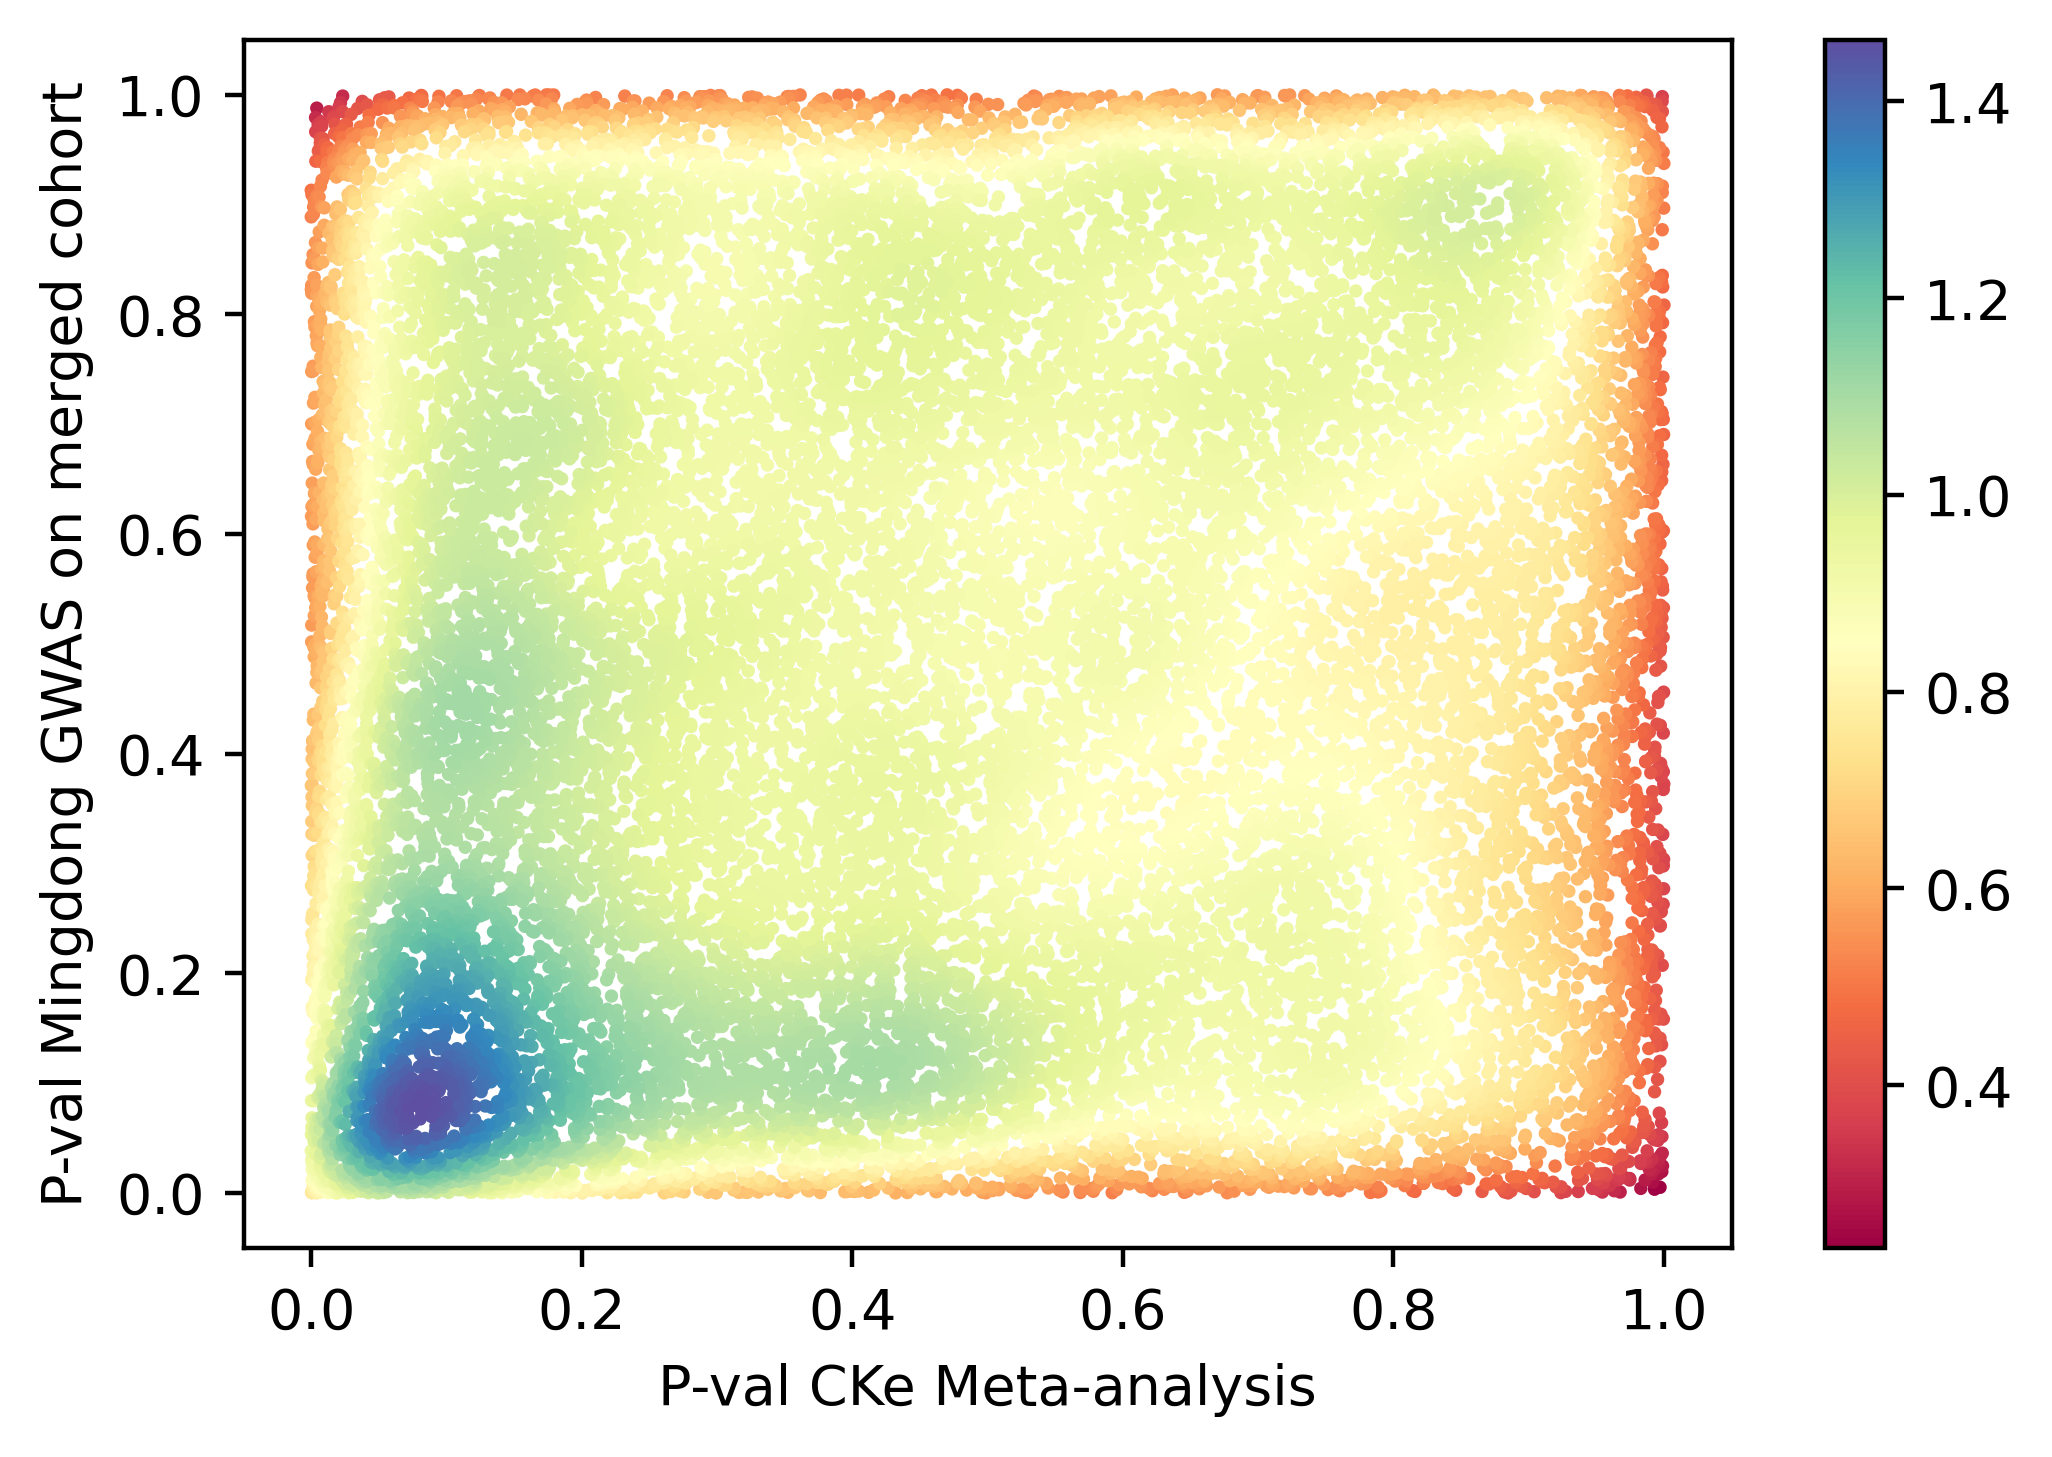

In [55]:
#gene-set compare
# Calculate the point density
plt.figure(dpi=400)
plt.xlabel('P-val CKe Meta-analysis')
plt.ylabel('P-val Mingdong GWAS on merged cohort')
x = merge_temp_SET['P_x']
y = merge_temp_SET['P_y']


xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
 
 # Sort the points by density, so that the densest points are plotted lastidx = z.argsort()
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

# fig, ax = plt.subplots()
# plt.xlim([0,0.2])
# plt.ylim([0,0.2])
plt.scatter(x, y,c=z,  s=2,cmap='Spectral')
plt.colorbar()
plt.show()

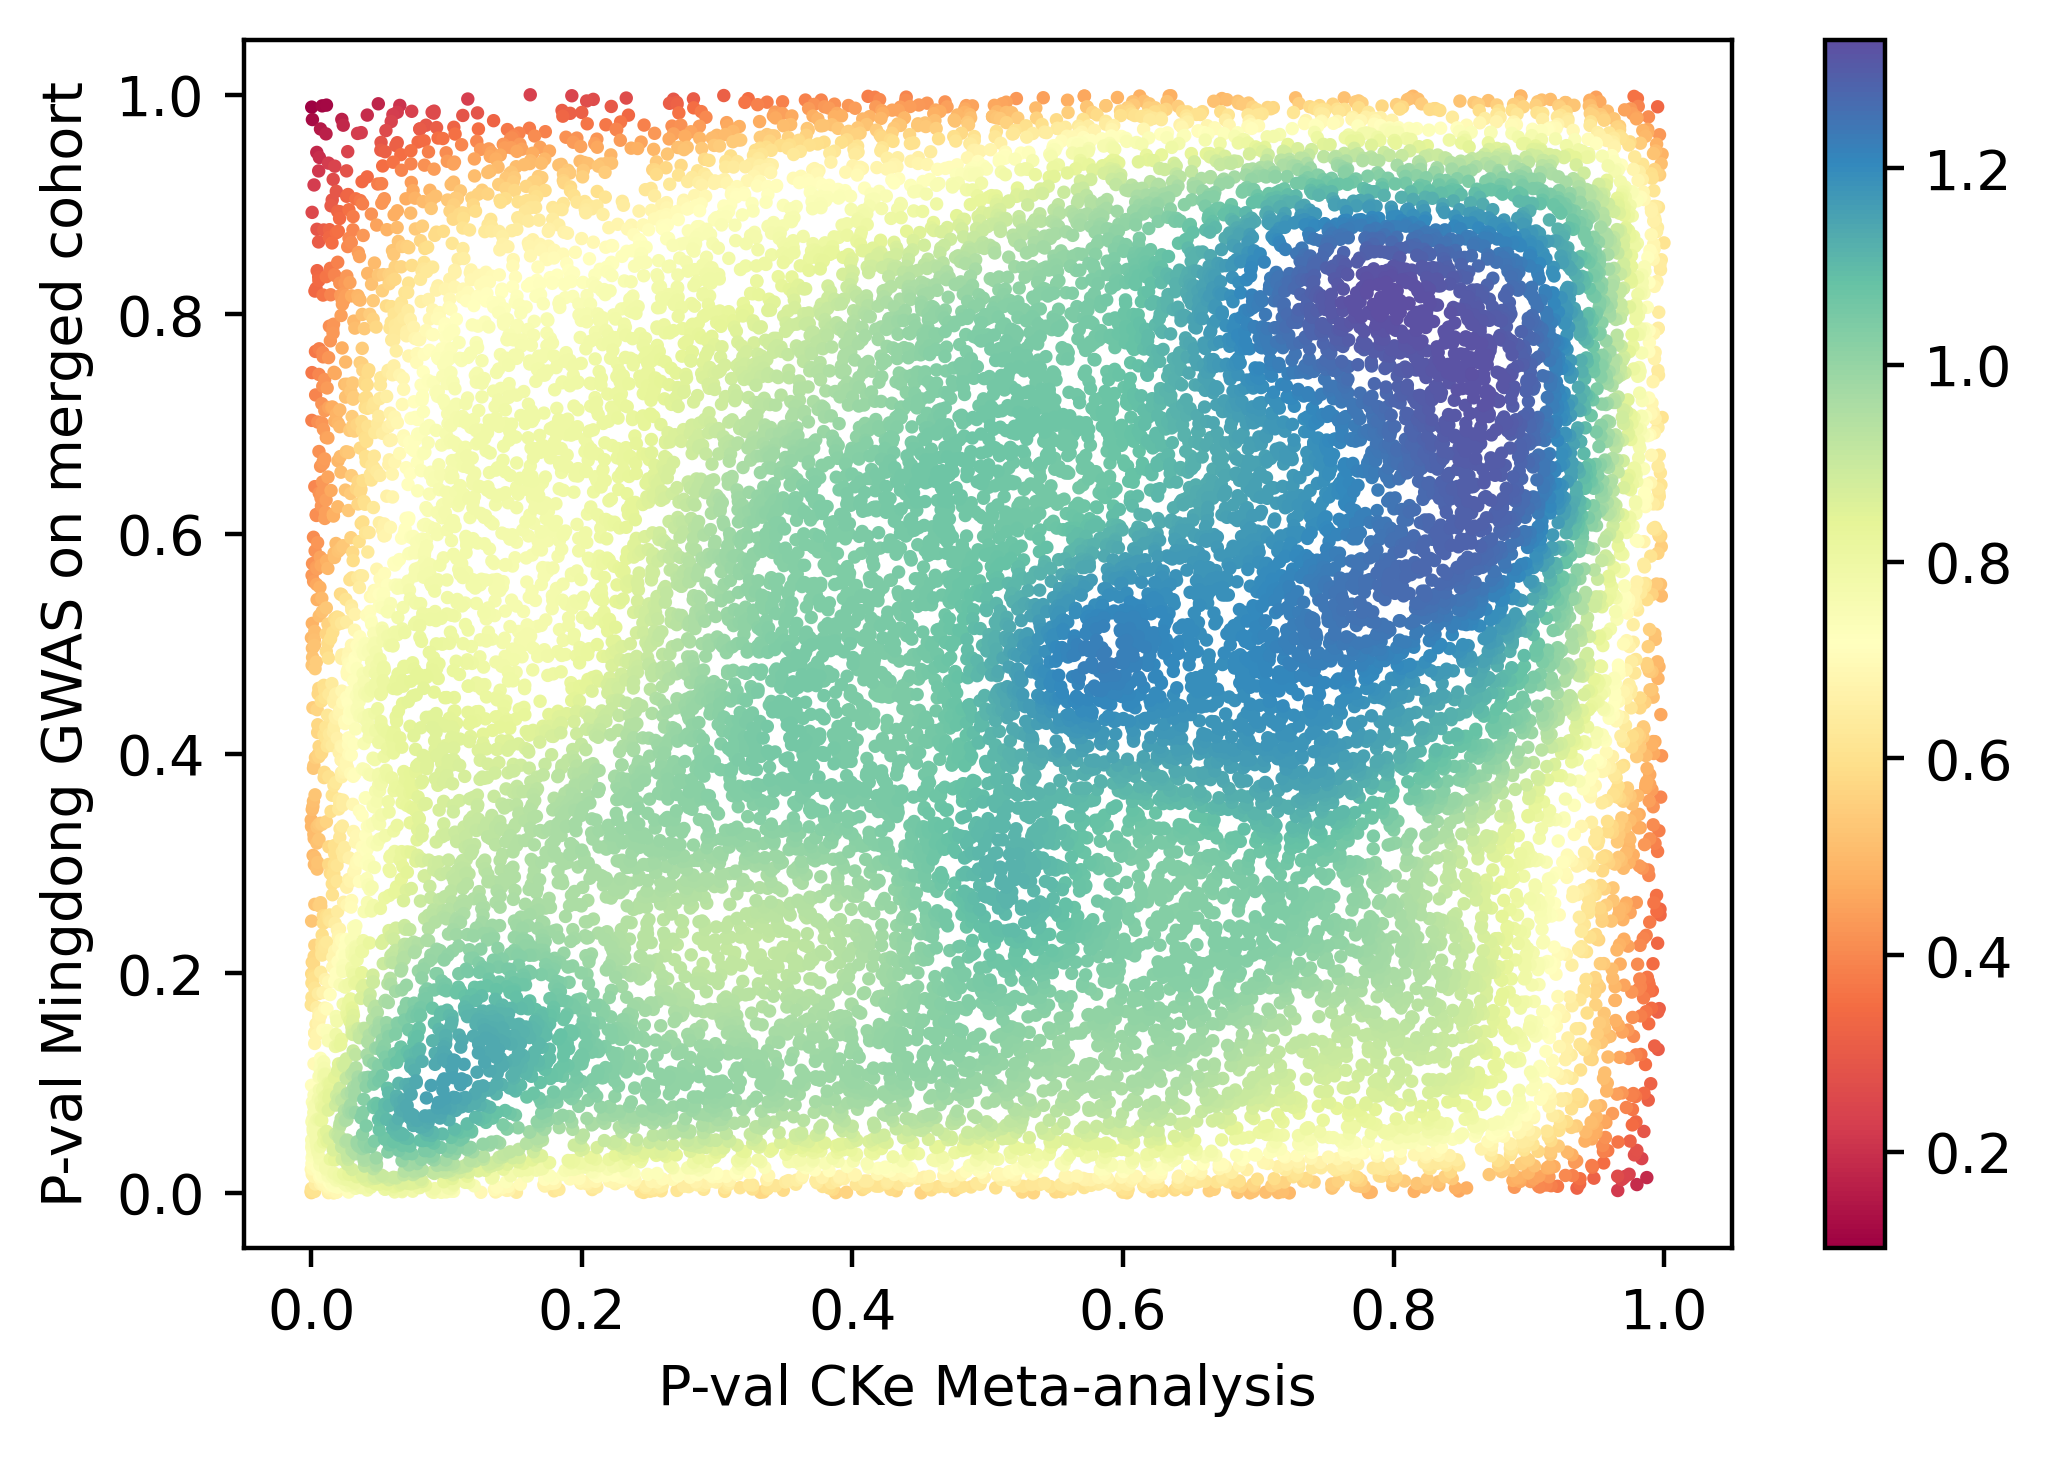

In [56]:
#gene compare
# Calculate the point density
plt.figure(dpi=400)
plt.xlabel('P-val CKe Meta-analysis')
plt.ylabel('P-val Mingdong GWAS on merged cohort')
x = merge_temp['P_MULTI_x']
y = merge_temp['P_MULTI_y']


xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
 
 # Sort the points by density, so that the densest points are plotted lastidx = z.argsort()
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

# fig, ax = plt.subplots()
# plt.xlim([0,0.2])
# plt.ylim([0,0.2])
plt.scatter(x, y,c=z,  s=2,cmap='Spectral')
plt.colorbar()
plt.show()

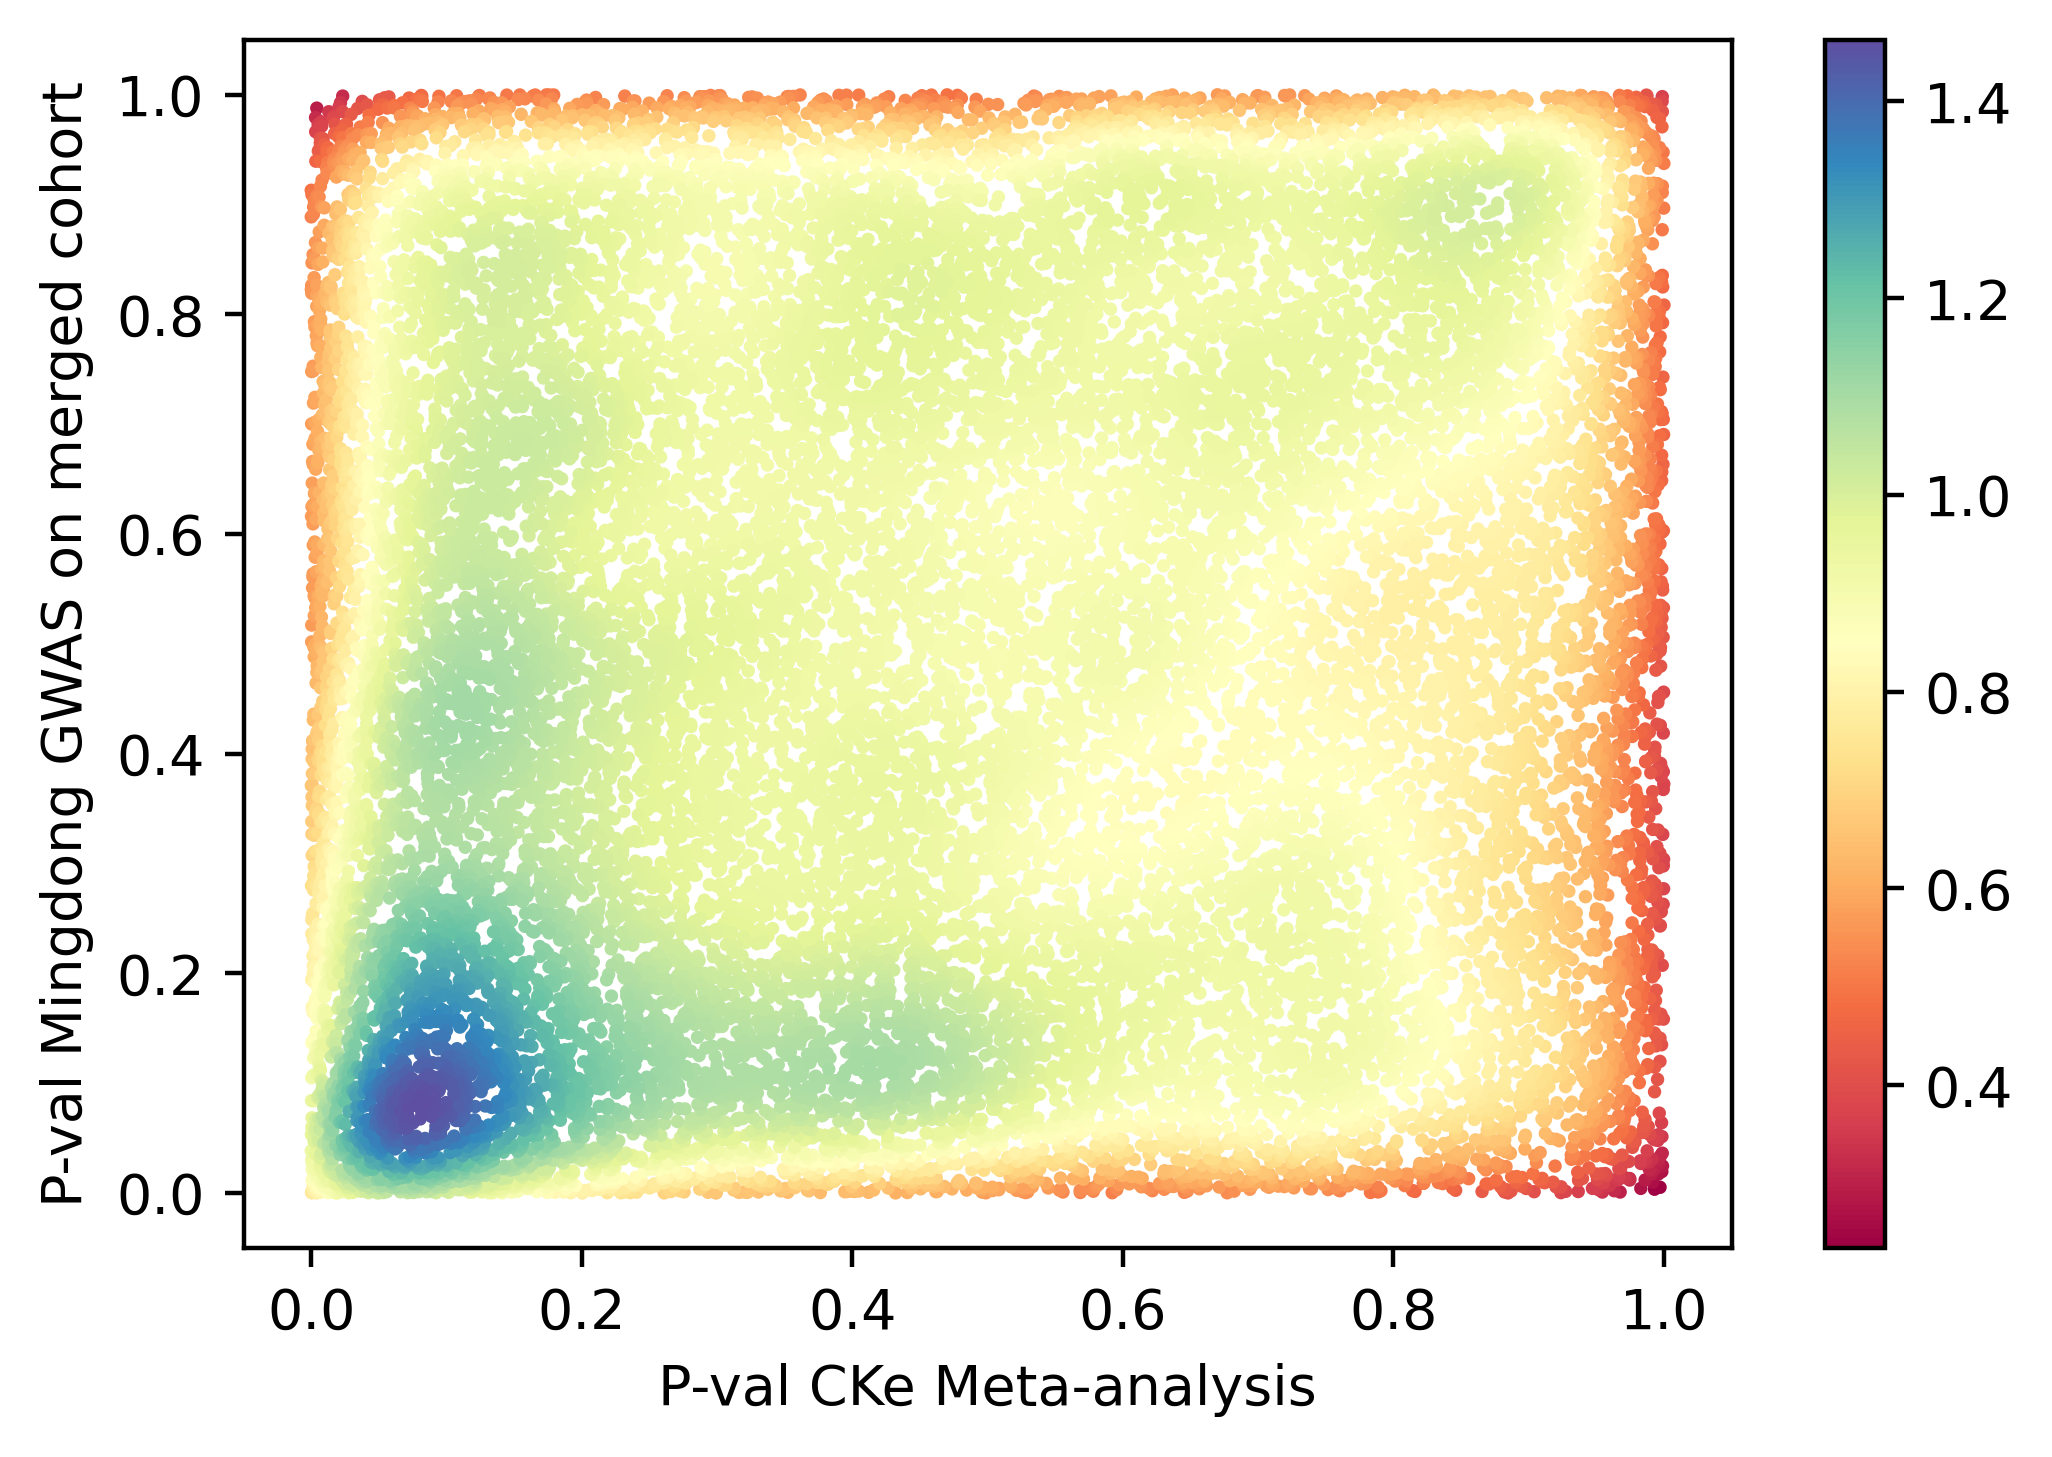

In [70]:
# merge_final_set
# gene set compare
# Calculate the point density
plt.figure(dpi=400)
plt.xlabel('P-val CKe Meta-analysis')
plt.ylabel('P-val Mingdong GWAS on merged cohort')
x = merge_final_set['P_x']
y = merge_final_set['P_y']


xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
 
 # Sort the points by density, so that the densest points are plotted lastidx = z.argsort()
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

# fig, ax = plt.subplots()
# plt.xlim([0,0.2])
# plt.ylim([0,0.2])
plt.scatter(x, y,c=z,  s=2,cmap='Spectral')
plt.colorbar()
plt.show()

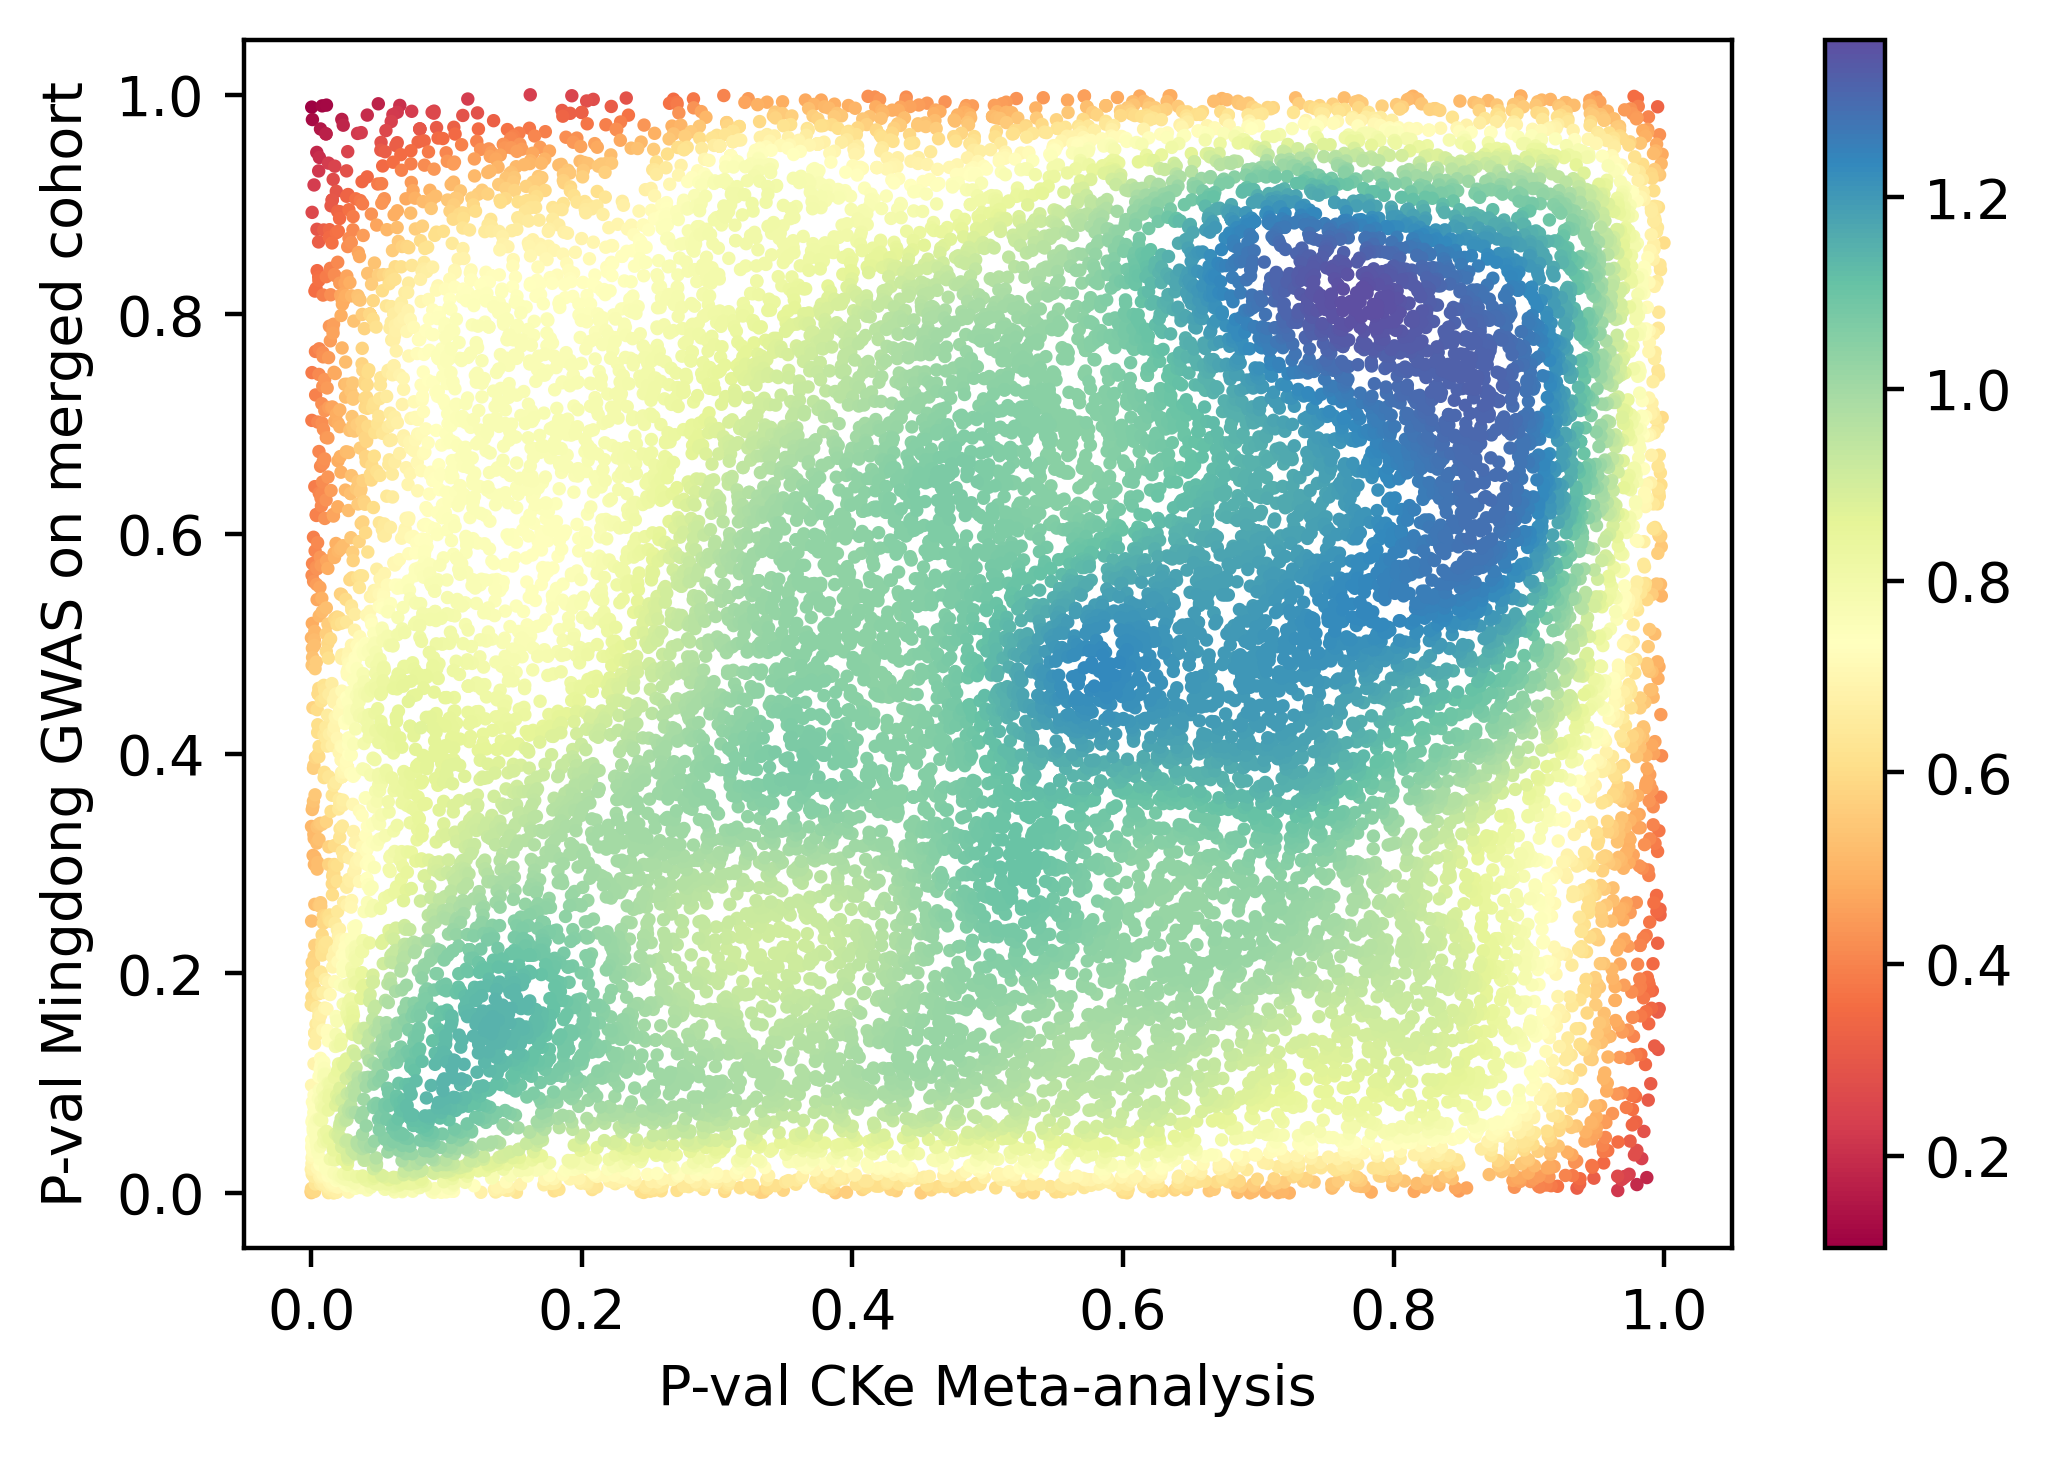

In [69]:
# merge_final_gene
# gene compare
# Calculate the point density
plt.figure(dpi=400)
plt.xlabel('P-val CKe Meta-analysis')
plt.ylabel('P-val Mingdong GWAS on merged cohort')
x = merge_final_gene['P_MULTI_x']
y = merge_final_gene['P_MULTI_y']


xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
 
 # Sort the points by density, so that the densest points are plotted lastidx = z.argsort()
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

# fig, ax = plt.subplots()
# plt.xlim([0,0.2])
# plt.ylim([0,0.2])
plt.scatter(x, y,c=z,  s=2,cmap='Spectral')
plt.colorbar()
plt.show()

In [43]:
#compare gene(set)-analysis result with Mingdong
merge_temp_SET=pd.merge(gene_set_result_old,Mingdong_SET,how='inner',on='VARIABLE')
merge_temp_SET
#EXACTLY THE SAME
#TODO: SORT ON MY PVAL AND TAKE TOP50, SAME FOR MINGDONG'S

VARIABLE TYPE_x  NGENES_x    BETA_x  \
0         BIOCARTA_GRANULOCYTES_PATHWAY    SET        14  0.095260   
1                  BIOCARTA_LYM_PATHWAY    SET        13  0.293660   
2          BIOCARTA_BLYMPHOCYTE_PATHWAY    SET        10  0.209330   
3              BIOCARTA_CARM_ER_PATHWAY    SET        24  0.204420   
4                 BIOCARTA_LAIR_PATHWAY    SET        16  0.072596   
...                                 ...    ...       ...       ...   
21693  GSE45365_NK_CELL_VS_CD8A_DC_...1    SET       193  0.022664   
21694  GSE45365_NK_CELL_VS_CD11B_DC...4    SET       187 -0.000642   
21695      GSE45365_NK_CELL_VS_BCELL_UP    SET       192  0.044267   
21696  GSE18804_SPLEEN_MACROPHAGE_V...4    SET       194  0.087711   
21697  GSE18804_SPLEEN_MACROPHAGE_V...3    SET       191 -0.040891   

       BETA_STD_x      SE_x       P_x  \
0        0.002640  0.192970  0.310780   
1        0.007843  0.215400  0.086406   
2        0.004904  0.259070  0.209540   
3        0.007415  0.186680  0.136770   
4        0.002151  0.184690  0.347140   
...           ...       ...       ...   
21693    0.002321  0.058601  0.349470   
21694   -0.000065  0.061327  0.504180   
21695    0.004521  0.058398  0.224230   
21696    0.009004  0.060458  0.073432   
21697   -0.004165  0.059198  0.755130   

                                             FULL_NAME_x  reject    p_corr  \
0                          BIOCARTA_GRANULOCYTES_PATHWAY   False  0.866749   
1                                   BIOCARTA_LYM_PATHWAY   False  0.733208   
2                           BIOCARTA_BLYMPHOCYTE_PATHWAY   False  0.812059   
3                               BIOCARTA_CARM_ER_PATHWAY   False  0.774180   
4                                  BIOCARTA_LAIR_PATHWAY   False  0.883364   
...                                                  ...     ...       ...   
21693                     GSE45365_NK_CELL_VS_CD8A_DC_DN   False  0.883364   
21694                    GSE45365_NK_CELL_VS_CD11B_DC_UP   False  0.918916   
21695                       GSE45365_NK_CELL_VS_BCELL_UP   False  0.823604   
21696  GSE18804_SPLEEN_MACROPHAGE_VS_COLON_TUMORAL_MA...   False  0.714597   
21697  GSE18804_SPLEEN_MACROPHAGE_VS_COLON_TUMORAL_MA...   False  0.963292   

      TYPE_y  NGENES_y    BETA_y  BETA_STD_y      SE_y       P_y  \
0        SET        15  0.148470    0.004249  0.220170  0.250050   
1        SET        13  0.311910    0.008311  0.252140  0.108050   
2        SET        11  0.525390    0.012878  0.301850  0.040887   
3        SET        24  0.205510    0.007438  0.204270  0.157210   
4        SET        17 -0.007086   -0.000216  0.210310  0.513440   
...      ...       ...       ...         ...       ...       ...   
21693    SET       193 -0.019289   -0.001971  0.060682  0.624710   
21694    SET       190 -0.041604   -0.004217  0.061135  0.751910   
21695    SET       193  0.072062    0.007362  0.060186  0.115600   
21696    SET       194  0.055316    0.005665  0.060835  0.181610   
21697    SET       192 -0.055604   -0.005666  0.060374  0.821470   

                                             FULL_NAME_y  
0                          BIOCARTA_GRANULOCYTES_PATHWAY  
1                                   BIOCARTA_LYM_PATHWAY  
2                           BIOCARTA_BLYMPHOCYTE_PATHWAY  
3                               BIOCARTA_CARM_ER_PATHWAY  
4                                  BIOCARTA_LAIR_PATHWAY  
...                                                  ...  
21693                     GSE45365_NK_CELL_VS_CD8A_DC_DN  
21694                    GSE45365_NK_CELL_VS_CD11B_DC_UP  
21695                       GSE45365_NK_CELL_VS_BCELL_UP  
21696  GSE18804_SPLEEN_MACROPHAGE_VS_COLON_TUMORAL_MA...  
21697  GSE18804_SPLEEN_MACROPHAGE_VS_COLON_TUMORAL_MA...  

[21698 rows x 17 columns]

In [18]:
merge_temp_SET[merge_temp_SET['FULL_NAME_x']=="GSE10500_ARTHRITIC_SYNOVIAL_FLUID_VS_HEALTHY_MACROPHAGE_DN"]

VARIABLE TYPE_x  NGENES_x    BETA_x  \
19495  GSE10500_ARTHRITIC_SYNOVIAL_...1    SET       131  0.036685   

       BETA_STD_x      SE_x      P_x  \
19495      0.0031  0.069662  0.29924   

                                             FULL_NAME_x TYPE_y  NGENES_y  \
19495  GSE10500_ARTHRITIC_SYNOVIAL_FLUID_VS_HEALTHY_M...    SET       132   

        BETA_y  BETA_STD_y      SE_y      P_y  \
19495  0.30561    0.025863  0.071613  0.00001   

                                             FULL_NAME_y  
19495  GSE10500_ARTHRITIC_SYNOVIAL_FLUID_VS_HEALTHY_M...

In [42]:
merge_temp=pd.merge(gene_result_old,Mingdong_gene,how='inner',on='GENE')
merge_temp
#Mine18215 Mingdong18300

GENE  CHR_x   START_x    STOP_x  NSNPS_x  NPARAM_x   N_x  ZSTAT_x  \
0         148398      1    824993    889961       81        13  4720  2.47600   
1         339451      1    860967    911099       94        17  4732  2.25630   
2          84069      1    866872    920488      112        20  4725  2.05910   
3          26155      1    869583    929679      121        20  4727  1.94580   
4          84808      1    900579    952473      115        18  4678  0.53522   
...          ...    ...       ...       ...      ...       ...   ...      ...   
18202        410     22  51051182  51101601      160        33  4845 -0.86366   
18203      85358     22  51078070  51181640      202        35  4709 -0.92716   
18204  101928892     22  51113086  51160473       95        24  4699 -1.71740   
18205         49     22  51141652  51193727       71        21  4546 -1.57310   
18206      11158     22  51195920  51257103       22         4  4414 -0.75086   

       P_MULTI_x  P_SNPWISE_MEAN_x  ...  CHR_y   START_y    STOP_y  NSNPS_y  \
0       0.006642          0.029230  ...      1    824993    889961       78   
1       0.012025          0.069274  ...      1    860967    911099       85   
2       0.019740          0.111950  ...      1    866872    920488      102   
3       0.025840          0.152150  ...      1    869583    929679      105   
4       0.296250          0.235380  ...      1    900579    952473       79   
...          ...               ...  ...    ...       ...       ...      ...   
18202   0.806110          0.997660  ...     22  51051182  51101601      157   
18203   0.823080          0.951650  ...     22  51078070  51181640      205   
18204   0.957050          0.911250  ...     22  51113086  51160473       98   
18205   0.942150          0.890530  ...     22  51141652  51193727       74   
18206   0.773630          0.711280  ...     22  51195920  51257103       24   

       NPARAM_y   N_y  ZSTAT_y  P_MULTI_y  P_SNPWISE_MEAN_y  P_SNPWISE_TOP1_y  
0            15  4338  1.94320   0.025998          0.020545          0.056389  
1            16  4338  1.04550   0.147900          0.277730          0.088994  
2            20  4338  0.80419   0.210640          0.432860          0.107800  
3            19  4338  0.73586   0.230910          0.493240          0.111150  
4            18  4338 -0.42233   0.663610          0.488260          0.783440  
...         ...   ...      ...        ...               ...               ...  
18202        31  4338  0.76040   0.223510          0.504520          0.103570  
18203        36  4338 -0.54306   0.706460          0.649390          0.656480  
18204        26  4338 -0.35539   0.638850          0.682550          0.516230  
18205        23  4338 -0.76595   0.778150          0.633340          0.831830  
18206         6  4338 -0.68764   0.754160          0.669290          0.791710  

[18207 rows x 23 columns]

In [67]:
#final Mingdong's data compare
merge_final_gene = pd.merge(gene_result_old,Mingdong_final_gene,how='inner',left_on="GENE",right_on='entrezgene_id')
merge_final_gene
#less genes but same amount of gene-sets overlapping

GENE  CHR     START      STOP  NSNPS_x  NPARAM_x   N_x  ZSTAT_x  \
0      148398    1    824993    889961       81        13  4720  2.47600   
1      339451    1    860967    911099       94        17  4732  2.25630   
2       84069    1    866872    920488      112        20  4725  2.05910   
3       26155    1    869583    929679      121        20  4727  1.94580   
4       84808    1    900579    952473      115        18  4678  0.53522   
...       ...  ...       ...       ...      ...       ...   ...      ...   
18550    1120   22  51007387  51056428      201        31  4901 -1.12470   
18551     410   22  51051182  51101601      160        33  4845 -0.86366   
18552   85358   22  51078070  51181640      202        35  4709 -0.92716   
18553      49   22  51141652  51193727       71        21  4546 -1.57310   
18554   11158   22  51195920  51257103       22         4  4414 -0.75086   

       P_MULTI_x  P_SNPWISE_MEAN_x  ...  start_position  end_position  \
0       0.006642          0.029230  ...          860260        879955   
1       0.012025          0.069274  ...          895967        901095   
2       0.019740          0.111950  ...          901877        911245   
3       0.025840          0.152150  ...          879584        894689   
4       0.296250          0.235380  ...          910579        917497   
...          ...               ...  ...             ...           ...   
18550   0.869640          0.794060  ...        51017378      51039884   
18551   0.806110          0.997660  ...        51061182      51066607   
18552   0.823080          0.951650  ...        51112843      51171726   
18553   0.942150          0.890530  ...        51176624      51183762   
18554   0.773630          0.711280  ...        51205929      51222091   

       NSNPS_y  NPARAM_y   N_y  ZSTAT_y  P_MULTI_y  P_SNPWISE_MEAN_y  \
0           78        15  4338  1.94320   0.025998          0.020545   
1           85        16  4338  1.04550   0.147900          0.277730   
2          102        20  4338  0.80419   0.210640          0.432860   
3          105        19  4338  0.73586   0.230910          0.493240   
4           79        18  4338 -0.42233   0.663610          0.488260   
...        ...       ...   ...      ...        ...               ...   
18550      207        29  4338 -0.76020   0.776430          0.917640   
18551      157        31  4338  0.76040   0.223510          0.504520   
18552      205        36  4338 -0.54306   0.706460          0.649390   
18553       74        23  4338 -0.76595   0.778150          0.633340   
18554       24         6  4338 -0.68764   0.754160          0.669290   

       P_SNPWISE_TOP1_y      q.BH  
0              0.056389  0.734349  
1              0.088994  0.942779  
2              0.107800  0.961888  
3              0.111150  0.963761  
4              0.783440  0.969953  
...                 ...       ...  
18550          0.608240  0.970689  
18551          0.103570  0.961888  
18552          0.656480  0.969953  
18553          0.831830  0.970689  
18554          0.791710  0.970689  

[18555 rows x 26 columns]

In [68]:
merge_final_set = pd.merge(gene_set_result_old,Mingdong_final_set,how='inner',on='VARIABLE')
merge_final_set

VARIABLE TYPE_x  NGENES_x    BETA_x  \
0         BIOCARTA_GRANULOCYTES_PATHWAY    SET        14  0.095260   
1                  BIOCARTA_LYM_PATHWAY    SET        13  0.293660   
2          BIOCARTA_BLYMPHOCYTE_PATHWAY    SET        10  0.209330   
3              BIOCARTA_CARM_ER_PATHWAY    SET        24  0.204420   
4                 BIOCARTA_LAIR_PATHWAY    SET        16  0.072596   
...                                 ...    ...       ...       ...   
21693  GSE45365_NK_CELL_VS_CD8A_DC_...1    SET       193  0.022664   
21694  GSE45365_NK_CELL_VS_CD11B_DC...4    SET       187 -0.000642   
21695      GSE45365_NK_CELL_VS_BCELL_UP    SET       192  0.044267   
21696  GSE18804_SPLEEN_MACROPHAGE_V...4    SET       194  0.087711   
21697  GSE18804_SPLEEN_MACROPHAGE_V...3    SET       191 -0.040891   

       BETA_STD_x      SE_x       P_x  \
0        0.002640  0.192970  0.310780   
1        0.007843  0.215400  0.086406   
2        0.004904  0.259070  0.209540   
3        0.007415  0.186680  0.136770   
4        0.002151  0.184690  0.347140   
...           ...       ...       ...   
21693    0.002321  0.058601  0.349470   
21694   -0.000065  0.061327  0.504180   
21695    0.004521  0.058398  0.224230   
21696    0.009004  0.060458  0.073432   
21697   -0.004165  0.059198  0.755130   

                                             FULL_NAME_x  reject    p_corr  \
0                          BIOCARTA_GRANULOCYTES_PATHWAY   False  0.866749   
1                                   BIOCARTA_LYM_PATHWAY   False  0.733208   
2                           BIOCARTA_BLYMPHOCYTE_PATHWAY   False  0.812059   
3                               BIOCARTA_CARM_ER_PATHWAY   False  0.774180   
4                                  BIOCARTA_LAIR_PATHWAY   False  0.883364   
...                                                  ...     ...       ...   
21693                     GSE45365_NK_CELL_VS_CD8A_DC_DN   False  0.883364   
21694                    GSE45365_NK_CELL_VS_CD11B_DC_UP   False  0.918916   
21695                       GSE45365_NK_CELL_VS_BCELL_UP   False  0.823604   
21696  GSE18804_SPLEEN_MACROPHAGE_VS_COLON_TUMORAL_MA...   False  0.714597   
21697  GSE18804_SPLEEN_MACROPHAGE_VS_COLON_TUMORAL_MA...   False  0.963292   

      TYPE_y  NGENES_y    BETA_y  BETA_STD_y      SE_y       P_y  \
0        SET        15  0.148470    0.004249  0.220170  0.250050   
1        SET        13  0.311910    0.008311  0.252140  0.108050   
2        SET        11  0.525390    0.012878  0.301850  0.040887   
3        SET        24  0.205510    0.007438  0.204270  0.157210   
4        SET        17 -0.007086   -0.000216  0.210310  0.513440   
...      ...       ...       ...         ...       ...       ...   
21693    SET       193 -0.019289   -0.001971  0.060682  0.624710   
21694    SET       190 -0.041604   -0.004217  0.061135  0.751910   
21695    SET       193  0.072062    0.007362  0.060186  0.115600   
21696    SET       194  0.055316    0.005665  0.060835  0.181610   
21697    SET       192 -0.055604   -0.005666  0.060374  0.821470   

                                             FULL_NAME_y      q.BH  
0                          BIOCARTA_GRANULOCYTES_PATHWAY  0.884361  
1                                   BIOCARTA_LYM_PATHWAY  0.796034  
2                           BIOCARTA_BLYMPHOCYTE_PATHWAY  0.663745  
3                               BIOCARTA_CARM_ER_PATHWAY  0.837538  
4                                  BIOCARTA_LAIR_PATHWAY  0.973780  
...                                                  ...       ...  
21693                     GSE45365_NK_CELL_VS_CD8A_DC_DN  0.993258  
21694                    GSE45365_NK_CELL_VS_CD11B_DC_UP  0.999980  
21695                       GSE45365_NK_CELL_VS_BCELL_UP  0.804912  
21696  GSE18804_SPLEEN_MACROPHAGE_VS_COLON_TUMORAL_MA...  0.856307  
21697  GSE18804_SPLEEN_MACROPHAGE_VS_COLON_TUMORAL_MA...  0.999980  

[21698 rows x 18 columns]

In [12]:
#results: 14 cohorts, Plink meta analysis with fixed effect model
gene_result_14 = pd.read_csv("/exports/reum/CKe/gene_analysis/A1corr_withPC_noMAFfilter/Meta_plink_fixed_gene_refSamantha.genes.out",sep='\s+')
gene_result_14.sort_values('P_MULTI')

GENE  CHR      START       STOP  NSNPS  NPARAM     N   ZSTAT  \
2820        7273    2  179380716  179707150    296      48  5329  4.9710   
13753      23274   16   11003345   11286046    480      64  5096  4.0678   
7412       64418    7  112395364  112465768     71      22  4988  3.6820   
7099      728927    7   63732815   63820017    204      32  5405  3.6104   
7413      154743    7  112449202  112614932    198      38  4684  3.5772   
...          ...  ...        ...        ...    ...     ...   ...     ...   
3882   100132731    3  128619002  128699843    152      27  5101 -3.2149   
13123      27229   15   43628257   43708258     73      13  5292 -3.2305   
4934       55714    4  183030112  183734177   1513     242  4979 -3.2379   
9521   100127889   10   97632722   97708415    137      34  5338 -3.3340   
4909        4750    4  170304421  170568778    354      39  5191 -3.6725   

            P_MULTI  P_SNPWISE_MEAN  P_SNPWISE_TOP1  
2820   3.330700e-07        0.000020        0.000001  
13753  2.372600e-05        0.001942        0.000044  
7412   1.157100e-04        0.000323        0.001514  
7099   1.528500e-04        0.000202        0.001928  
7413   1.736200e-04        0.000260        0.003792  
...             ...             ...             ...  
3882   9.993500e-01        0.992900        0.997190  
13123  9.993800e-01        0.995460        0.995340  
4934   9.994000e-01        0.996100        0.990720  
9521   9.995700e-01        0.996980        0.998060  
4909   9.998800e-01        0.999070        0.996820  

[18315 rows x 11 columns]

In [20]:
gene_set_result_14=pd.read_table("/exports/reum/CKe/gene_analysis/A1corr_withPC_noMAFfilter/Meta_plink_fixed_allMsigdb_refSamantha.gsa.out",sep='\s+',skiprows=4)
gene_set_result_14.sort_values('P')

VARIABLE TYPE  NGENES     BETA  BETA_STD  \
27020       GOMF_GALACTOSIDASE_ACTIVITY  SET       7  1.93920  0.037904   
3542                         MIR6739_3P  SET     182  0.25321  0.025117   
26554   GOMF_BETA_GALACTOSIDASE_ACTI...  SET       6  1.68630  0.030517   
13068  GSE25087_FETAL_VS_ADULT_TCON...2  SET     186  0.23549  0.023611   
7184                     HP_MENORRHAGIA  SET      29  0.64352  0.025587   
...                                 ...  ...     ...      ...       ...   
16924  MATSUMIYA_PBMC_MODIFIED_VACC...1  SET      63 -0.41478 -0.024286   
18750   GOBP_ICOSANOID_METABOLIC_PRO...  SET     111 -0.31110 -0.024146   
20043   GOBP_INTERKINETIC_NUCLEAR_MI...  SET       5 -1.40290 -0.023178   
31078   REACTOME_ARACHIDONIC_ACID_ME...  SET      57 -0.44450 -0.024760   
2326    KEGG_ARACHIDONIC_ACID_METABO...  SET      58 -0.48488 -0.027244   

             SE             P  \
27020  0.386920  2.728300e-07   
3542   0.060774  1.555800e-05   
26554  0.405460  1.608200e-05   
13068  0.058037  2.492000e-05   
7184   0.159220  2.668200e-05   
...         ...           ...   
16924  0.111060  9.999100e-01   
18750  0.081204  9.999400e-01   
20043  0.358510  9.999500e-01   
31078  0.112270  9.999600e-01   
2326   0.108350  1.000000e+00   

                                               FULL_NAME  
27020                        GOMF_GALACTOSIDASE_ACTIVITY  
3542                                          MIR6739_3P  
26554                   GOMF_BETA_GALACTOSIDASE_ACTIVITY  
13068                   GSE25087_FETAL_VS_ADULT_TCONV_UP  
7184                                      HP_MENORRHAGIA  
...                                                  ...  
16924  MATSUMIYA_PBMC_MODIFIED_VACCINIA_ANKARA_VACCIN...  
18750                   GOBP_ICOSANOID_METABOLIC_PROCESS  
20043                GOBP_INTERKINETIC_NUCLEAR_MIGRATION  
31078               REACTOME_ARACHIDONIC_ACID_METABOLISM  
2326                    KEGG_ARACHIDONIC_ACID_METABOLISM  

[32230 rows x 8 columns]

In [10]:
gene_result_old=pd.read_csv("/exports/reum/CKe/gene_analysis/ref_Samantha/Meta_gene.genes.out",sep='\s+')
gene_result_old.sort_values('P_MULTI')

GENE  CHR      START       STOP  NSNPS  NPARAM     N   ZSTAT  \
11592   23426   12   66731178   67498014   2061     151  4912  4.0251   
216    353238    1   17663741   17738195    336      36  4928  4.0097   
7027   728927    7   63732815   63820017    380      30  5058  3.9717   
217     55920    1   17723251   17801250    210      20  4924  3.9632   
4381    10744    4   37927056   37972631    136      22  4782  3.8279   
...       ...  ...        ...        ...    ...     ...   ...     ...   
13258   57611   15   74385544   74439143     22      10  4642 -2.8615   
10634   27314   11   82674177   82817965    266      34  4881 -2.8928   
13476    9727   16     440649     582485    319      30  4705 -2.9644   
1207     9898    1  154157427  154253986    110      17  4716 -2.9713   
2634   344148    2  133419361  134434118   2261     191  4874 -3.6493   

        P_MULTI  P_SNPWISE_MEAN  P_SNPWISE_TOP1  
11592  0.000028        0.000316        0.001885  
216    0.000030        0.000225        0.000216  
7027   0.000036        0.000083        0.000186  
217    0.000037        0.000433        0.000105  
4381   0.000065        0.000108        0.000406  
...         ...             ...             ...  
13258  0.997890        0.997990        0.991420  
10634  0.998090        0.987750        0.998340  
13476  0.998480        0.992950        0.994790  
1207   0.998520        0.997600        0.990800  
2634   0.999870        0.998920        0.990730  

[18215 rows x 11 columns]

In [37]:
tohits_gene_CKe = gene_result_old.sort_values('P_MULTI')[:50]
gene_result_old.sort_values('P_MULTI')[:50]

GENE  CHR      START       STOP  NSNPS  NPARAM     N   ZSTAT  \
11592   23426   12   66731178   67498014   2061     151  4912  4.0251   
216    353238    1   17663741   17738195    336      36  4928  4.0097   
7027   728927    7   63732815   63820017    380      30  5058  3.9717   
217     55920    1   17723251   17801250    210      20  4924  3.9632   
4381    10744    4   37927056   37972631    136      22  4782  3.8279   
5291     2241    5  108048523  108533373   1575      68  4989  3.6125   
8590     9830    9  100788071  100916695    220      33  4620  3.5931   
2217     3344    2   48506783   48616434    268      30  5002  3.5510   
12549   11169   14   55395656   55528819    235      22  4980  3.5107   
12253    7174   13  103214286  103341524    471      31  4893  3.4854   
5858     4739    6   11173531   11417581    687      82  4751  3.4222   
16592    1209   19   45422842   45506604    197      22  4840  3.3794   
17162  140733   20   13941146   16043842   5485     352  4859  3.3744   
3402    56992    3   44768209   44904748    125      19  4875  3.3657   
3403    57456    3   44780236   44838173     55      10  4949  3.3551   
12642   56936   14   70026531   70076600     64      11  4730  3.2931   
12548    2643   14   55298723   55404603    258      22  4935  3.2889   
16593    5971   19   45469707   45551456    148      22  4766  3.2758   
1870   128178    1  236522680  236658008    447      55  4688  3.2667   
1332     9447    1  159018790  159081685    114      15  4864  3.2614   
7028   340252    7   63970255   64058505    262      21  4985  3.2520   
16089  388512   19   14658896   14731956    200      30  4777  3.2363   
15693   84634   19     882342     931015     90      24  4532  3.2312   
11945    9612   12  124798957  125087079    746     110  4586  3.2165   
9049   221044   10   13253771   13311331    292      47  4704  3.2072   
16090    4713   19   14666890   14717889    138      22  4775  3.1985   
10198    6749   11   57083459   57138351    125      20  4945  3.1983   
3404   131616    3   44868408   44917156     55      15  4792  3.1888   
17004  256051   19   58003693   58062244    198      12  5033  3.1817   
16063   81576   19   13807574   13884108     75       7  4701  3.1808   
16087    9524   19   14605379   14686792    197      30  4780  3.1700   
14577    8834   17   21091263   21152974    125      24  4704  3.1694   
3401   115560    3   44736098   44788575     70      17  4835  3.1643   
2732     4036    2  169973619  170254123    723      84  4783  3.1552   
4479    55236    4   68471479   68601889    351      22  4978  3.1264   
14578  256302   17   21132183   21191578    133      29  4571  3.1257   
6933    11281    7   38982609   39514390   1432      81  4951  3.1255   
17003  374928   19   57976222   58039772    271      14  5035  3.1026   
8589    54187    9  100783959  100855365    117      16  4681  3.0993   
1555    10625    1  185255520  185321461     57      14  4677  3.0939   
12550  122809   14   55458844   55526207    105      13  4992  3.0863   
7881    54928    8   57860488   57941430    134      24  4849  3.0694   
17792   23765   22   17530849   17606584    184      29  4435  3.0341   
13982   79650   16   57998450   58065527    144      19  4771  3.0314   
10332   79842   11   62508435   62556656     54      14  4892  3.0247   
4771     1998    4  139968871  140133372    190      22  4896  3.0219   
13981  374739   16   57975339   58032020    137      22  4774  3.0200   
10039    5954   11   32077477   32137272    135      18  4836  3.0008   
8868     9329    9  135510728  135575471    152      16  4773  2.9869   
4770    25819    4  139901913  139977093     92      20  4758  2.9844   

        P_MULTI  P_SNPWISE_MEAN  P_SNPWISE_TOP1  reject    p_corr  
11592  0.000028        0.000316        0.001885   False  0.168393  
216    0.000030        0.000225        0.000216   False  0.168393  
7027   0.000036        0.000083        0.000186   False  0.168393  
217    0.0000

In [12]:
gene_set_result_old=pd.read_table("/exports/reum/CKe/gene_analysis/ref_Samantha/Meta.gsa.out",sep='\s+',skiprows=4)
gene_set_result_old.sort_values('P')

VARIABLE TYPE  NGENES     BETA  BETA_STD  \
6105                            CREB_02  SET     243  0.23917  0.027440   
6155                            CREB_Q4  SET     254  0.22328  0.026183   
3981                         MIR1537_5P  SET     113  0.31883  0.025035   
13007        GOBP_MUCOCILIARY_CLEARANCE  SET       5  1.47500  0.024435   
13843   GOBP_EMBRYONIC_BRAIN_DEVELOP...  SET       8  1.12340  0.023539   
...                                 ...  ...     ...      ...       ...   
10109   GOBP_ODONTOGENESIS_OF_DENTIN...  SET      82 -0.31752 -0.021257   
998        KEGG_BETA_ALANINE_METABOLISM  SET      21 -0.60341 -0.020477   
3226                            MIR4310  SET     272 -0.17898 -0.021708   
7265    GOBP_FRUCTOSE_6_PHOSPHATE_ME...  SET      11 -1.11500 -0.027392   
17353  GSE17721_LPS_VS_POLYIC_0.5H_...1  SET     190 -0.24737 -0.025133   

             SE         P                                      FULL_NAME  
6105   0.053338  0.000004                                        CREB_02  
6155   0.053313  0.000014                                        CREB_Q4  
3981   0.077429  0.000019                                     MIR1537_5P  
13007  0.391510  0.000083                     GOBP_MUCOCILIARY_CLEARANCE  
13843  0.300340  0.000092               GOBP_EMBRYONIC_BRAIN_DEVELOPMENT  
...         ...       ...                                            ...  
10109  0.091735  0.999730  GOBP_ODONTOGENESIS_OF_DENTIN_CONTAINING_TOOTH  
998    0.171790  0.999780                   KEGG_BETA_ALANINE_METABOLISM  
3226   0.049728  0.999840                                        MIR4310  
7265   0.296840  0.999910    GOBP_FRUCTOSE_6_PHOSPHATE_METABOLIC_PROCESS  
17353  0.058636  0.999990            GSE17721_LPS_VS_POLYIC_0.5H_BMDC_DN  

[21698 rows x 8 columns]

In [38]:
tophits_set_CKe = gene_set_result_old.sort_values('P')[:50]
gene_set_result_old.sort_values('P')[:50]

VARIABLE TYPE  NGENES      BETA  BETA_STD  \
6105                              CREB_02  SET     243  0.239170  0.027440   
6155                              CREB_Q4  SET     254  0.223280  0.026183   
3981                           MIR1537_5P  SET     113  0.318830  0.025035   
13007          GOBP_MUCOCILIARY_CLEARANCE  SET       5  1.475000  0.024435   
13843     GOBP_EMBRYONIC_BRAIN_DEVELOP...  SET       8  1.123400  0.023539   
14557            GOCC_PCG_PROTEIN_COMPLEX  SET      42  0.446740  0.021428   
1825         REACTOME_CELLULAR_SENESCENCE  SET     190  0.238860  0.024268   
9089      GOBP_ACTIN_CYTOSKELETON_REOR...  SET     100  0.295160  0.021810   
2403             REACTOME_PTEN_REGULATION  SET     132  0.247100  0.020960   
15580     GOMF_C_METHYLTRANSFERASE_ACT...  SET       5  1.798400  0.029793   
11605             GOBP_SYNAPSE_MATURATION  SET      24  0.639040  0.023182   
3937                              MIR4457  SET     117  0.254830  0.020359   
18079    GSE29615_CTRL_VS_DAY3_LAIV_I...1  SET     167  0.210960  0.020108   
9132   GOBP_POSITIVE_REGULATION_OF_...632  SET      25  0.552490  0.020455   
19371    GSE9601_UNTREATED_VS_NFKB_IN...1  SET     168  0.216310  0.020678   
14451              GOCC_SECRETORY_GRANULE  SET     809  0.100850  0.020778   
2813     REACTOME_NR1H2_NR1H3_REGULAT...4  SET       9  1.139400  0.025321   
6154                              CREB_Q2  SET     252  0.178080  0.020801   
11968     GOBP_PRI_MIRNA_TRANSCRIPTION...  SET      50  0.388200  0.020311   
17483    GSE17721_LPS_VS_CPG_2H_BMDC_...1  SET     191  0.199960  0.020369   
14932     GOCC_AIM2_INFLAMMASOME_COMPL...  SET       5  1.631800  0.027033   
19749    GSE15735_CTRL_VS_HDAC_INHIBI...1  SET     193  0.198390  0.020314   
17271    GSE17580_UNINFECTED_VS_S_MAN...3  SET     194  0.199490  0.020479   
7252     GOBP_CHONDROCYTE_DIFFERENTIA...2  SET      14  0.750090  0.020788   
16290     GOMF_SIGNALING_ADAPTOR_ACTIV...  SET      70  0.317580  0.019650   
21220    GSE11961_MARGINAL_ZONE_BCELL...8  SET     192  0.195400  0.019956   
7255     GOBP_GROWTH_PLATE_CARTILAGE_...2  SET       9  0.887000  0.019712   
6054                              CREB_01  SET     258  0.167590  0.019805   
12316             GOBP_GENETIC_IMPRINTING  SET      24  0.549980  0.019951   
15550     GOMF_PROTEIN_C_TERMINUS_BIND...  SET     181  0.203750  0.020210   
2243     REACTOME_RHO_GTPASES_ACTIVAT...3  SET      30  0.485750  0.019697   
7376     GOBP_REGULATION_OF_GENE_EXPR...1  SET      15  0.667540  0.019149   
2486     REACTOME_RNA_POLYMERASE_II_T...2  SET    1306  0.080997  0.020897   
14418     GOCC_PROTEASOME_ACCESSORY_CO...  SET      23  0.597370  0.021214   
7798             GOBP_DOSAGE_COMPENSATION  SET      16  0.663310  0.019651   
1149                      PID_E2F_PATHWAY  SET      70  0.302110  0.018693   
720       WP_DISRUPTION_OF_POSTSYNAPTI...  SET      29  0.484760  0.019327   
18881    GSE1791_CTRL_VS_NEUROMEDINU_...1  SET     168  0.204080  0.019509   
14854              GOCC_SHELTERIN_COMPLEX  SET       7  1.119900  0.021950   
20477    GSE27241_WT_CTRL_VS_DIGOXIN_...2  SET     168  0.200800  0.019195   
2408      REACTOME_COPI_INDEPENDENT_GO...  SET      51  0.380300  0.020095   
5801                   FOXR2_TARGET_GENES  SET     185  0.193850  0.019437   
97       KEGG_GLYCOSAMINOGLYCAN_BIOSY...3  SET      15  0.675240  0.019370   
3037                              MIR9985  SET     600  0.108970  0.019449   
13393  GOBP_POSITIVE_REGULATION_OF_...625  SET      38  0.419080  0.019122   
11665     GOBP_REGULATION_OF_BLOOD_VES...  SET       6  0.968140  0.017569   
2139      REACTOME_MITOTIC_G1_PHASE_AN...  SET     142  0.208330  0.018323   
2423      REACTOME_ORC1_REMOVAL_FROM_C...  SET      68  0.309050  0.018848   
15048              GOCC_SECRETORY_VESICLE  SET     954  0.085303  0.019004   
6722         GOBP_MEIOTIC_MISMATCH_REPAIR  SET       4  1.661500  0.024620   

             SE         P                             

In [14]:
gene_set_allMsigdb_old = pd.read_table("/exports/reum/CKe/gene_analysis/ref_Samantha/Meta_allMsigdb.gsa.out",sep='\s+',skiprows=4)
gene_set_allMsigdb_old.sort_values('P')

VARIABLE TYPE  NGENES     BETA  BETA_STD  \
11957                      NRL_DN.V1_UP  SET     134  0.32585  0.027846   
6181                            CREB_02  SET     243  0.23917  0.027440   
6231                            CREB_Q4  SET     254  0.22328  0.026183   
4057                         MIR1537_5P  SET     113  0.31883  0.025035   
305    FOURNIER_ACINAR_DEVELOPMENT_...2  SET      20  0.86140  0.028529   
...                                 ...  ...     ...      ...       ...   
3302                            MIR4310  SET     272 -0.17898 -0.021708   
9508    HP_YELLOW_BROWN_DISCOLORATIO...  SET       6 -1.15710 -0.020997   
18490   GOBP_FRUCTOSE_6_PHOSPHATE_ME...  SET      11 -1.11500 -0.027392   
1892    MIKKELSEN_NPC_HCP_WITH_H3K27...  SET     340 -0.17327 -0.023452   
12515  GSE17721_LPS_VS_POLYIC_0.5H_...1  SET     190 -0.24737 -0.025133   

             SE         P                                    FULL_NAME  
11957  0.072408  0.000003                                 NRL_DN.V1_UP  
6181   0.053338  0.000004                                      CREB_02  
6231   0.053313  0.000014                                      CREB_Q4  
4057   0.077429  0.000019                                   MIR1537_5P  
305    0.210860  0.000022         FOURNIER_ACINAR_DEVELOPMENT_EARLY_UP  
...         ...       ...                                          ...  
3302   0.049728  0.999840                                      MIR4310  
9508   0.318480  0.999860   HP_YELLOW_BROWN_DISCOLORATION_OF_THE_TEETH  
18490  0.296840  0.999910  GOBP_FRUCTOSE_6_PHOSPHATE_METABOLIC_PROCESS  
1892   0.046244  0.999910              MIKKELSEN_NPC_HCP_WITH_H3K27ME3  
12515  0.058636  0.999990          GSE17721_LPS_VS_POLYIC_0.5H_BMDC_DN  

[32230 rows x 8 columns]

In [39]:
tophits_set = pd.merge(tophits_set_CKe,tophits_set_Mingdong,how='inner',on="VARIABLE")
tophits_gene = pd.merge(tohits_gene_CKe,tophits_gene_Mingdong,how='inner',on='GENE')

In [40]:
#OVERLAP TOP50 HITS
tophits_set
#PTEN Regulation, PTEN is regulated at the level of gene transcription, mRNA translation, localization and protein stability.
#Interacting selectively and non-covalently with a protein C-terminus, the end of any peptide chain at which the 1-carboxyl function of a constituent amino acid is not attached in peptide linkage to another amino-acid residue. [ISBN:0198506732]

VARIABLE TYPE_x  NGENES_x   BETA_x  BETA_STD_x  \
0         REACTOME_PTEN_REGULATION    SET       132  0.24710     0.02096   
1  GOMF_PROTEIN_C_TERMINUS_BIND...    SET       181  0.20375     0.02021   

       SE_x       P_x                      FULL_NAME_x  reject    p_corr  \
0  0.070380  0.000224         REACTOME_PTEN_REGULATION   False  0.386245   
1  0.062441  0.000552  GOMF_PROTEIN_C_TERMINUS_BINDING   False  0.386245   

  TYPE_y  NGENES_y   BETA_y  BETA_STD_y      SE_y       P_y  \
0    SET       135  0.23315    0.019952  0.070860  0.000502   
1    SET       181  0.22461    0.022227  0.062992  0.000182   

                       FULL_NAME_y  
0         REACTOME_PTEN_REGULATION  
1  GOMF_PROTEIN_C_TERMINUS_BINDING

In [41]:
tophits_gene
#ZNF736 zinc finger protein 736
#PTTG2 pituitary tumor-transforming 2
#ZNF549 zinc finger protein 549
#BPNT2 3'(2'), 5'-bisphosphate nucleotidase 2

GENE  CHR_x   START_x    STOP_x  NSNPS_x  NPARAM_x   N_x  ZSTAT_x  \
0  728927      7  63732815  63820017      380        30  5058   3.9717   
1   10744      4  37927056  37972631      136        22  4782   3.8279   
2  256051     19  58003693  58062244      198        12  5033   3.1817   
3   54928      8  57860488  57941430      134        24  4849   3.0694   

   P_MULTI_x  P_SNPWISE_MEAN_x  ...  CHR_y   START_y    STOP_y  NSNPS_y  \
0   0.000036          0.000083  ...      7  63732815  63820017      404   
1   0.000065          0.000108  ...      4  37927056  37972631      126   
2   0.000732          0.002651  ...     19  58003693  58062244      214   
3   0.001073          0.001901  ...      8  57860488  57941430      147   

   NPARAM_y   N_y  ZSTAT_y  P_MULTI_y  P_SNPWISE_MEAN_y  P_SNPWISE_TOP1_y  
0        34  4338   2.9841   0.001422          0.001126          0.008834  
1        22  4338   3.3949   0.000343          0.000357          0.002909  
2        14  4338   2.9308   0.001690          0.002451          0.017987  
3        28  4338   2.9840   0.001422          0.000880          0.030406  

[4 rows x 23 columns]

In [11]:
#DEPRECATED
def qvalue(pvalues, method='BH'):
    """Calculate adjusted P-values by the Benjamini-Hochberg method.
    Args:
        pvalues (list): p-value list or array
        method (str): `BH` (Benjamini-Hochberg) or `BY` (Benjamini-Yekutieli)
    Returns:
        numpy.ndarray: q-value array
    """
    pvals = pvalues if isinstance(pvalues, np.ndarray) else np.array(pvalues)
    if np.sum((pvals < 0) | (pvals > 1)):
        raise ValueError('Invalid p-values')
    else:
        n = len(pvals)
        df_p = pd.DataFrame({'pval': pvals}).sort_values(
            by='pval', ascending=True
        
        ).reset_index()
    if method == 'BH':
        df_q = df_p.assign(qval=lambda d: (d['pval'] * n / (d.index+1)))
    elif method == 'BY':
        w = np.sum(np.reciprocal(np.arange(1, n + 1, dtype='float32')))
        df_q = df_p.assign(
            qval=lambda d: (d['pval'] * n / (n - d.index.values) * w).cummin()
        )
    else:
        raise ValueError('Unimplemented method')
    return df_q.set_index('index', drop=True).sort_index()['qval'].clip(lower=0, upper=1).values
gene_result['P_BHAdj'] = qvalue(gene_result['P_MULTI'])

NameError: name 'gene_result' is not defined

In [ ]:
#check result and significance left after BH correction

In [62]:
gene_result_old

GENE  CHR     START      STOP  NSNPS  NPARAM     N    ZSTAT  \
0         148398    1    824993    889961     81      13  4720  2.47600   
1         339451    1    860967    911099     94      17  4732  2.25630   
2          84069    1    866872    920488    112      20  4725  2.05910   
3          26155    1    869583    929679    121      20  4727  1.94580   
4          84808    1    900579    952473    115      18  4678  0.53522   
...          ...  ...       ...       ...    ...     ...   ...      ...   
18210        410   22  51051182  51101601    160      33  4845 -0.86366   
18211      85358   22  51078070  51181640    202      35  4709 -0.92716   
18212  101928892   22  51113086  51160473     95      24  4699 -1.71740   
18213         49   22  51141652  51193727     71      21  4546 -1.57310   
18214      11158   22  51195920  51257103     22       4  4414 -0.75086   

        P_MULTI  P_SNPWISE_MEAN  P_SNPWISE_TOP1  reject    p_corr  
0      0.006642        0.029230        0.004476   False  0.770694  
1      0.012025        0.069274        0.005833   False  0.824259  
2      0.019740        0.111950        0.008344   False  0.886817  
3      0.025840        0.152150        0.008632   False  0.897914  
4      0.296250        0.235380        0.365910   False  0.990600  
...         ...             ...             ...     ...       ...  
18210  0.806110        0.997660        0.584840   False  0.990600  
18211  0.823080        0.951650        0.620640   False  0.990600  
18212  0.957050        0.911250        0.949860   False  0.991203  
18213  0.942150        0.890530        0.938880   False  0.991203  
18214  0.773630        0.711280        0.799320   False  0.990600  

[18215 rows x 13 columns]

In [61]:
gene_result_old[gene_result_old['reject']==True] #a=0.3, got first hit: zinc finger protein 736

Empty DataFrame
Columns: [GENE, CHR, START, STOP, NSNPS, NPARAM, N, ZSTAT, P_MULTI, P_SNPWISE_MEAN, P_SNPWISE_TOP1, reject, p_corr]
Index: []

In [60]:
gene_set_result_old

VARIABLE TYPE  NGENES      BETA  BETA_STD  \
0         BIOCARTA_GRANULOCYTES_PATHWAY  SET      14  0.095260  0.002640   
1                  BIOCARTA_LYM_PATHWAY  SET      13  0.293660  0.007843   
2          BIOCARTA_BLYMPHOCYTE_PATHWAY  SET      10  0.209330  0.004904   
3              BIOCARTA_CARM_ER_PATHWAY  SET      24  0.204420  0.007415   
4                 BIOCARTA_LAIR_PATHWAY  SET      16  0.072596  0.002151   
...                                 ...  ...     ...       ...       ...   
21693  GSE45365_NK_CELL_VS_CD8A_DC_...1  SET     193  0.022664  0.002321   
21694  GSE45365_NK_CELL_VS_CD11B_DC...4  SET     187 -0.000642 -0.000065   
21695      GSE45365_NK_CELL_VS_BCELL_UP  SET     192  0.044267  0.004521   
21696  GSE18804_SPLEEN_MACROPHAGE_V...4  SET     194  0.087711  0.009004   
21697  GSE18804_SPLEEN_MACROPHAGE_V...3  SET     191 -0.040891 -0.004165   

             SE         P                                          FULL_NAME  \
0      0.192970  0.310780                      BIOCARTA_GRANULOCYTES_PATHWAY   
1      0.215400  0.086406                               BIOCARTA_LYM_PATHWAY   
2      0.259070  0.209540                       BIOCARTA_BLYMPHOCYTE_PATHWAY   
3      0.186680  0.136770                           BIOCARTA_CARM_ER_PATHWAY   
4      0.184690  0.347140                              BIOCARTA_LAIR_PATHWAY   
...         ...       ...                                                ...   
21693  0.058601  0.349470                     GSE45365_NK_CELL_VS_CD8A_DC_DN   
21694  0.061327  0.504180                    GSE45365_NK_CELL_VS_CD11B_DC_UP   
21695  0.058398  0.224230                       GSE45365_NK_CELL_VS_BCELL_UP   
21696  0.060458  0.073432  GSE18804_SPLEEN_MACROPHAGE_VS_COLON_TUMORAL_MA...   
21697  0.059198  0.755130  GSE18804_SPLEEN_MACROPHAGE_VS_COLON_TUMORAL_MA...   

       reject    p_corr  
0       False  0.866749  
1       False  0.733208  
2       False  0.812059  
3       False  0.774180  
4       False  0.883364  
...       ...       ...  
21693   False  0.883364  
21694   False  0.918916  
21695   False  0.823604  
21696   False  0.714597  
21697   False  0.963292  

[21698 rows x 10 columns]

In [28]:
gene_set_result_old[gene_set_result_old['reject']==True] #got one significant gene-set after bh correction, it is exactly the one in MAGMA output

Empty DataFrame
Columns: [VARIABLE, TYPE, NGENES, BETA, BETA_STD, SE, P, FULL_NAME, reject, p_corr]
Index: []

In [29]:
gene_set_allMsigdb_old

VARIABLE TYPE  NGENES      BETA  BETA_STD  \
0                              chr1p12  SET      18 -0.214230 -0.006731   
1                              chr1p13  SET     116 -0.106750 -0.008492   
2                              chr1p21  SET      38 -0.388260 -0.017716   
3                              chr1p22  SET      66 -0.006348 -0.000381   
4                              chr1p31  SET      82 -0.384170 -0.025718   
...                                ...  ...     ...       ...       ...   
32225                REACTOME_KINESINS  SET      57  0.019188  0.001072   
32226  REACTOME_FACTORS_INVOLVED_IN...  SET     164 -0.004577 -0.000432   
32227  REACTOME_ANTIGEN_ACTIVATES_B...  SET      27  0.081815  0.003148   
32228  REACTOME_SIGNALING_BY_THE_B_...  SET     103  0.172500  0.012935   
32229  REACTOME_ION_CHANNEL_TRANSPO...  SET     171  0.027461  0.002648   

             SE         P                                          FULL_NAME  \
0      0.332140  0.740540                                            chr1p12   
1      0.179240  0.724270                                            chr1p13   
2      0.251050  0.939000                                            chr1p21   
3      0.199700  0.512680                                            chr1p22   
4      0.176820  0.985090                                            chr1p31   
...         ...       ...                                                ...   
32225  0.108470  0.429800                                  REACTOME_KINESINS   
32226  0.068992  0.526450  REACTOME_FACTORS_INVOLVED_IN_MEGAKARYOCYTE_DEV...   
32227  0.157120  0.301290  REACTOME_ANTIGEN_ACTIVATES_B_CELL_RECEPTOR_BCR...   
32228  0.081799  0.017488      REACTOME_SIGNALING_BY_THE_B_CELL_RECEPTOR_BCR   
32229  0.063459  0.332600                     REACTOME_ION_CHANNEL_TRANSPORT   

       reject    p_corr  
0       False  0.963172  
1       False  0.962147  
2       False  0.993361  
3       False  0.929171  
4       False  0.999448  
...       ...       ...  
32225   False  0.913448  
32226   False  0.932382  
32227   False  0.880459  
32228   False  0.621574  
32229   False  0.891242  

[32230 rows x 10 columns]

In [21]:
"""
Returns 
reject
ndarray, bool
true for hypothesis that can be rejected for given alpha

pvals_corrected
ndarray
p-values corrected for multiple tests

alphacSidak
float
corrected alpha for Sidak method

alphacBonf
float
"""
reject,pval_cor,asidak,abonf=statsmodels.stats.multitest.multipletests(gene_result_old['P_MULTI'], alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)
gene_result_old['reject']=reject
gene_result_old['p_corr']=pval_cor
print(True in reject,asidak,abonf)

False 2.8159880409717175e-06 2.7449903925336264e-06


In [22]:
reject,pval_cor,asidak,abonf=statsmodels.stats.multitest.multipletests(gene_set_result_old['P'], alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)
gene_set_result_old['reject']=reject
gene_set_result_old['p_corr']=pval_cor
print(True in reject,asidak,abonf)

False 2.363961367879419e-06 2.304359848833994e-06


In [23]:
reject,pval_cor,asidak,abonf=statsmodels.stats.multitest.multipletests(gene_set_allMsigdb_old['P'], alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)
gene_set_allMsigdb_old['reject']=reject
gene_set_allMsigdb_old['p_corr']=pval_cor
print(True in reject,asidak,abonf)

False 1.5914754443180357e-06 1.5513496742165686e-06


In [ ]:
# 18475 rows in gene annotation